# Part I
In this part you should answer the questions (or performing the requested tasks) using the **adult.csv** file you find in the *Data* folder. 

In case you want to learn more about this dataset : https://archive.ics.uci.edu/ml/datasets/Adult

Feel free to import any library you want.

## Load the adult.csv

- Make sure that you're not loosing the first row!
- Name the columns: 
'age',
'workclass',
'fnlwgt',
'education',
'education-num',
'marital-status',
'occupation',
'relationship',
'race',
'sex',
'capital-gain',
'capital-loss',
'hours-per-week',
'native-country',
'income'


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/Users/navid/Google Drive/active_python_files/Python_introduction/Data/adult.csv', header=None)

In [4]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
              'marital-status', 'occupation', 'relationship', 'race', 'sex',
              'capital-gain', 'capital-loss', 'hours-per-week',
              'native-country', 'income']

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Remove these columns: 'fnlwgt', 'education-num'

In [6]:
df.drop(columns=['fnlwgt', 'education-num'], inplace=True)
#df.drop(['fnlwgt', 'education-num'], axis=1, inplace=False)

#df = df.drop(['fnlwgt', 'education-num'], axis=1)
#df.drop(['fnlwgt', 'education-num'], axis=1, inplace=True)

## Remove all the records with capital-loss equal to 810 or 213

Don't forget to reset the index of the DataFrame

In [7]:
df = df[(df['capital-loss'] != 810) & (df['capital-loss'] != 213)].reset_index(drop=True)

In [8]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Report the missing data for each column

In [9]:
from tqdm.auto import tqdm

In [10]:
a = 'a gf y d hj k v d h k v '.split()
for i in tqdm(a):
    print(i*5)

aaaaa
gfgfgfgfgf
yyyyy
ddddd
hjhjhjhjhj
kkkkk
vvvvv
ddddd
hhhhh
kkkkk
vvvvv



In [11]:
nan_count = [1 for x in tqdm(df['occupation']) if str(x) == 'nan']

In [12]:
sum(nan_count)

0

In [13]:
import numpy as np
df.replace(' ?', np.nan, inplace=True)

In [14]:
df['occupation'] = df['occupation'].apply(lambda x : x.strip())

AttributeError: 'float' object has no attribute 'strip'

In [15]:
temp = []
for i in tqdm(df['occupation']):
    try:
        temp.append(i.strip())
        
    except AttributeError:
        temp.append(np.nan)

In [16]:
df['occupation'] = temp

In [17]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

## Create a new column containing the average value of 'capital-gain' and 'capital-loss'

Name the new column as *avg_capitial*

In [18]:
df['avg_capitial'] = sum([df['capital-gain'] + df['capital-loss']]) / 2

In [19]:
df['avg_capitial'] = np.mean([df['capital-gain'], df['capital-loss']], axis=0)

In [20]:
tqdm.pandas()
df['avg_capitial'] = df.progress_apply(lambda row: np.mean([row['capital-gain'],
                                                            row['capital-loss']]),
                                                            axis = 1) 

/Users/navid/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [21]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,avg_capitial
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1087.0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0.0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0.0


## Make a scatter plot of 'age' and 'avg_capital'

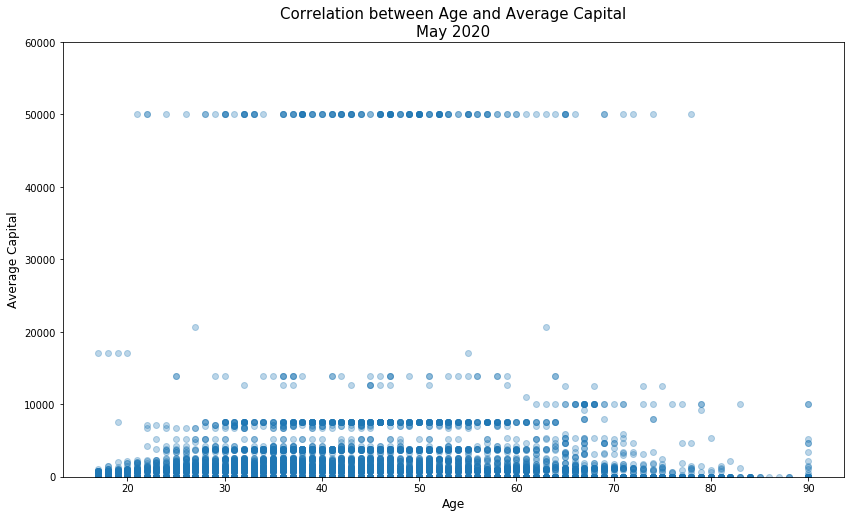

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 14, 8

plt.scatter(df.age, df.avg_capitial, alpha=0.3 )
plt.title('Correlation between Age and Average Capital\nMay 2020', fontsize=15)
plt.xlabel('Age', fontsize= 12)
plt.ylabel('Average Capital', fontsize= 12)
plt.ylim(0, 60_000)
#plt.savefig('Corr2020.png', dpi=600)
plt.show()



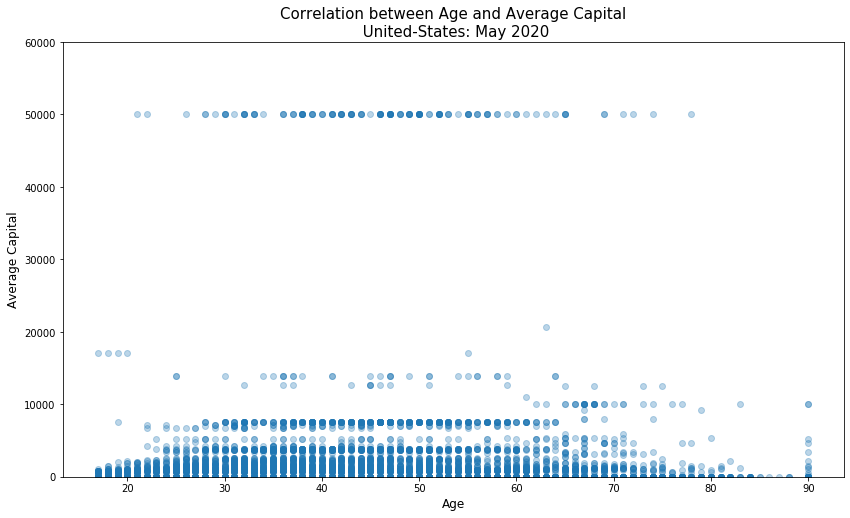

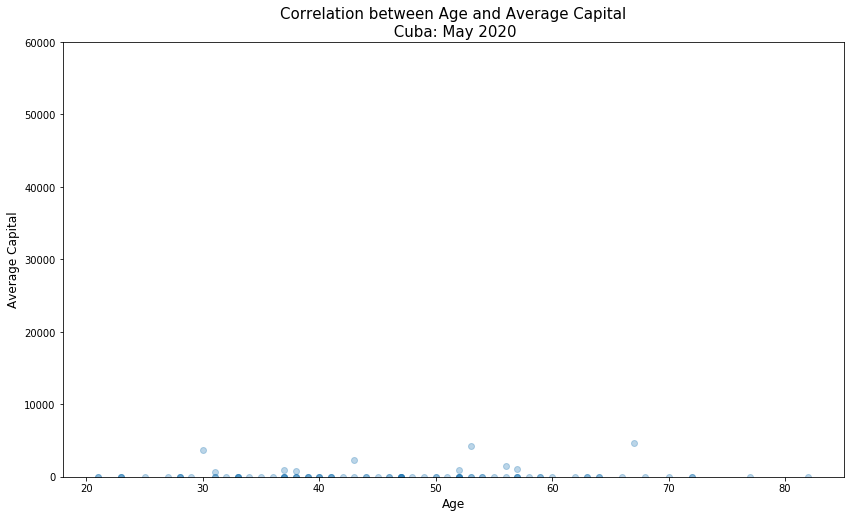

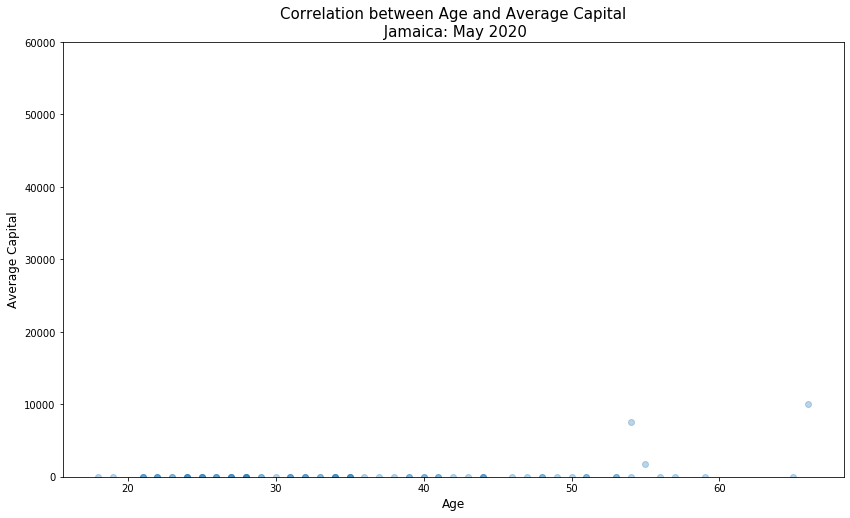

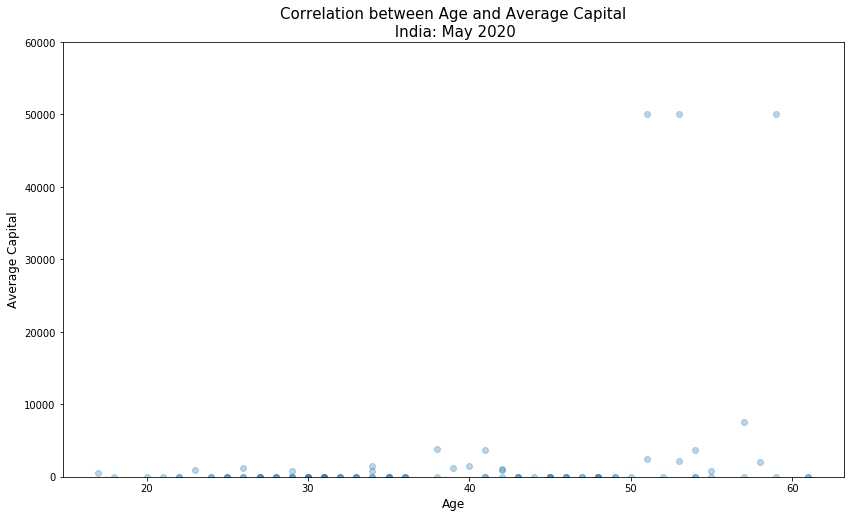

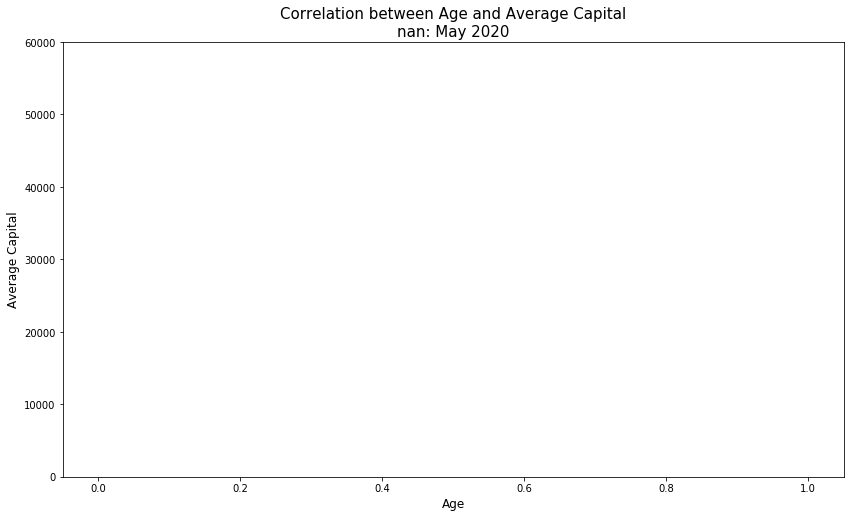

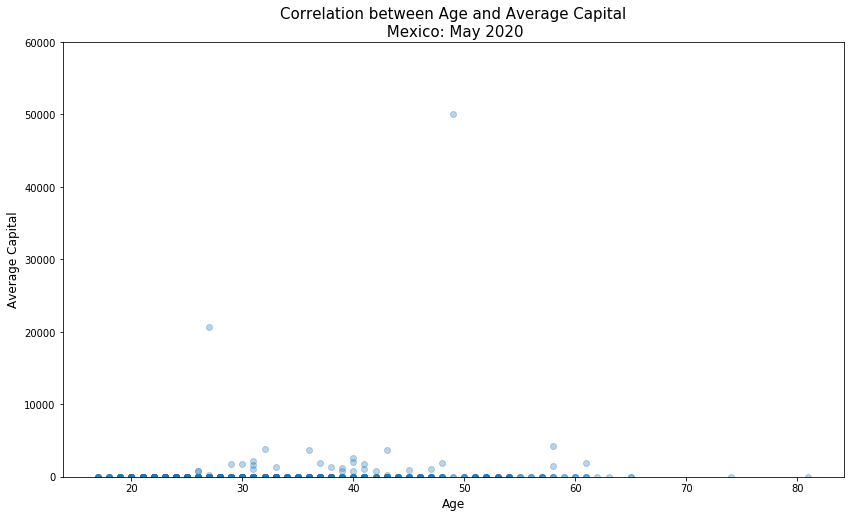

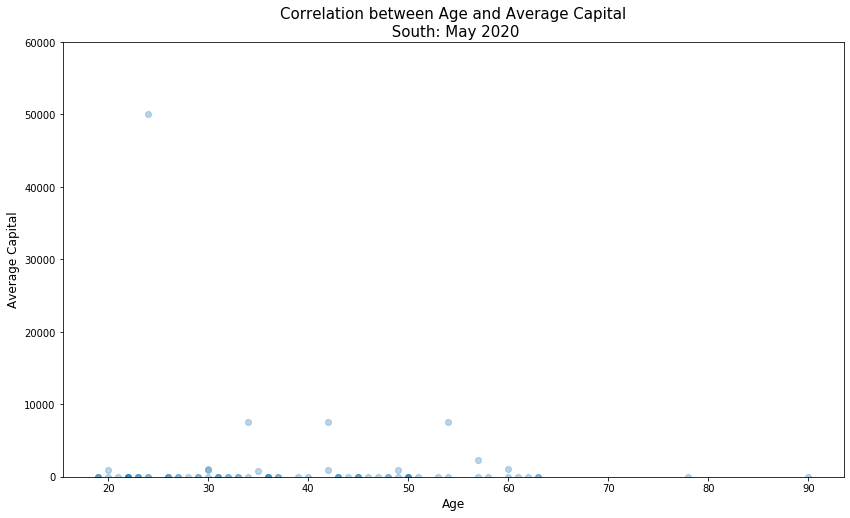

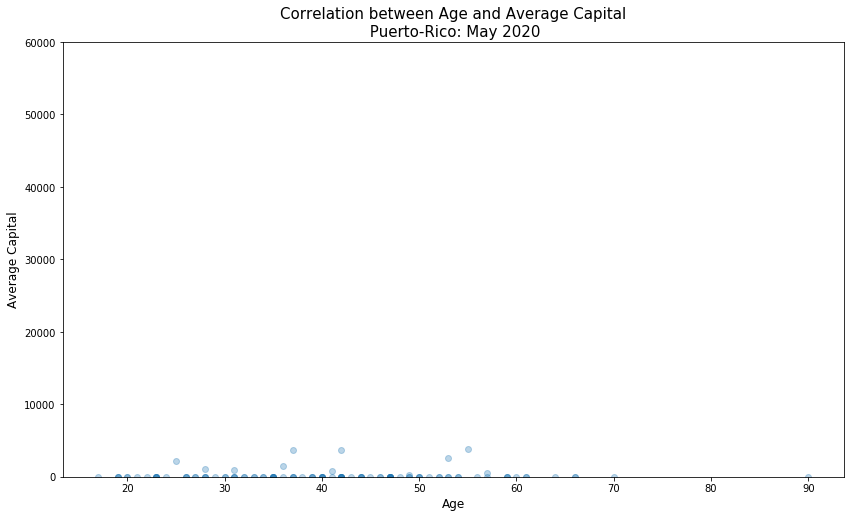

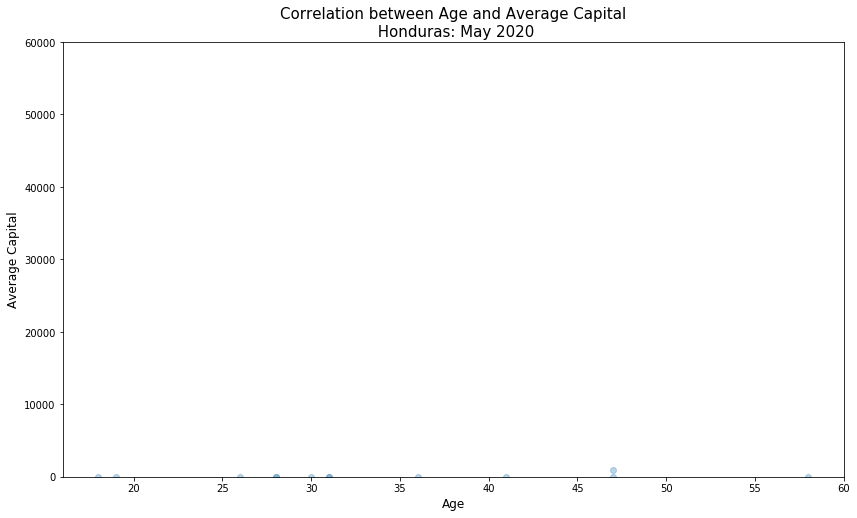

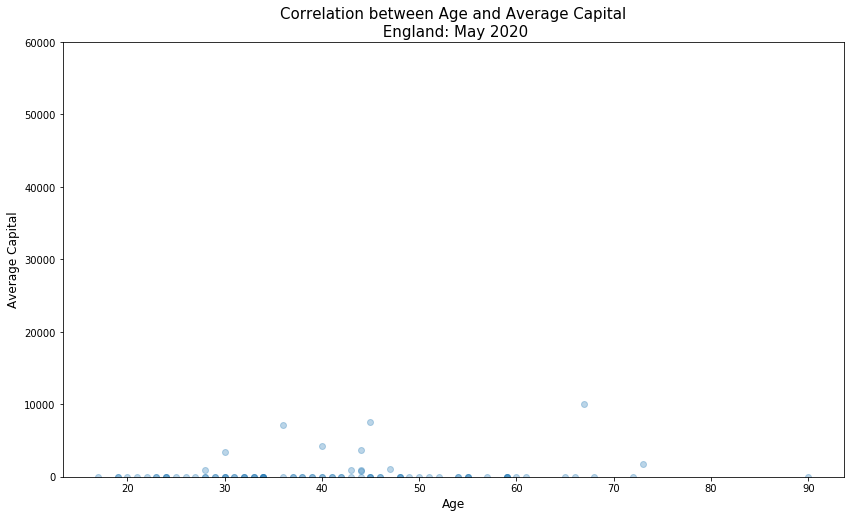

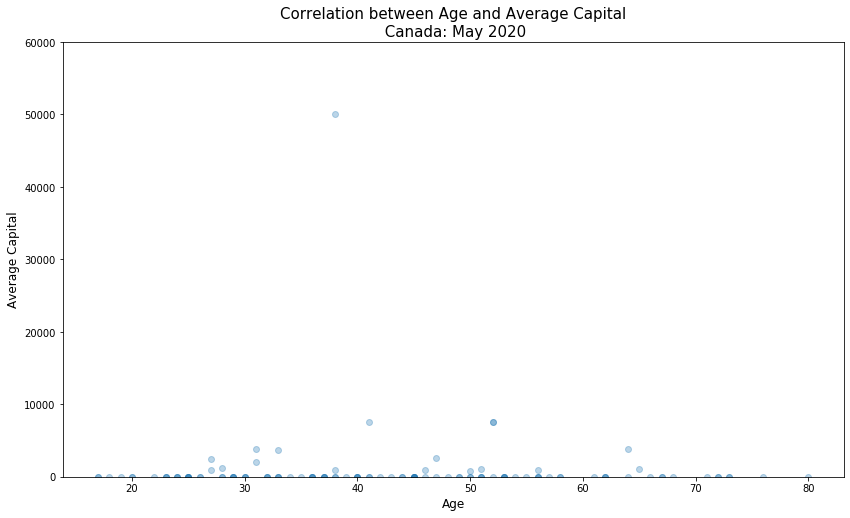

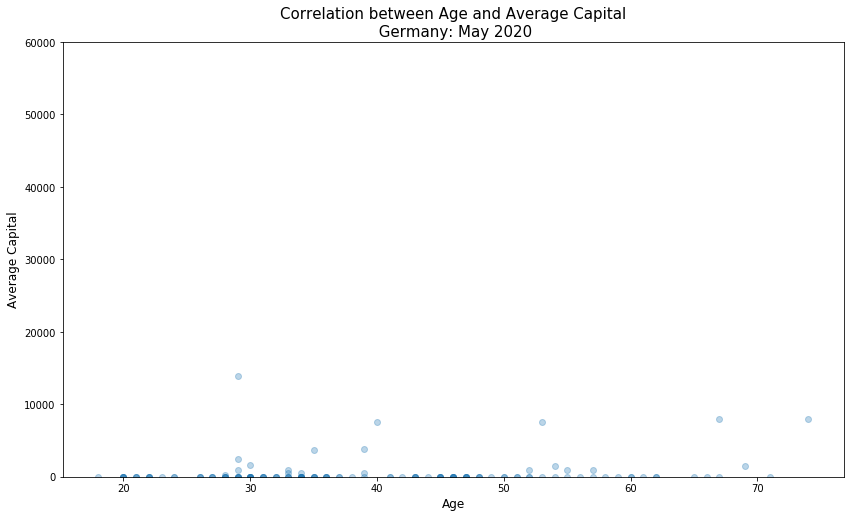

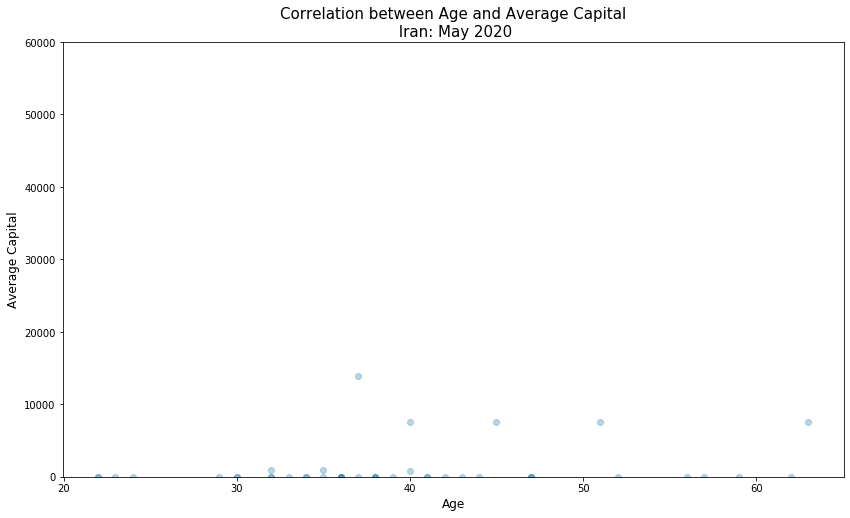

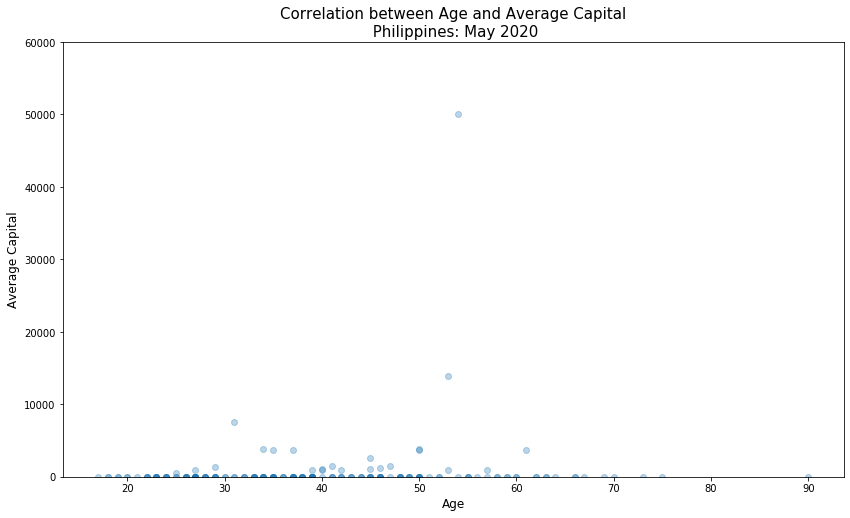

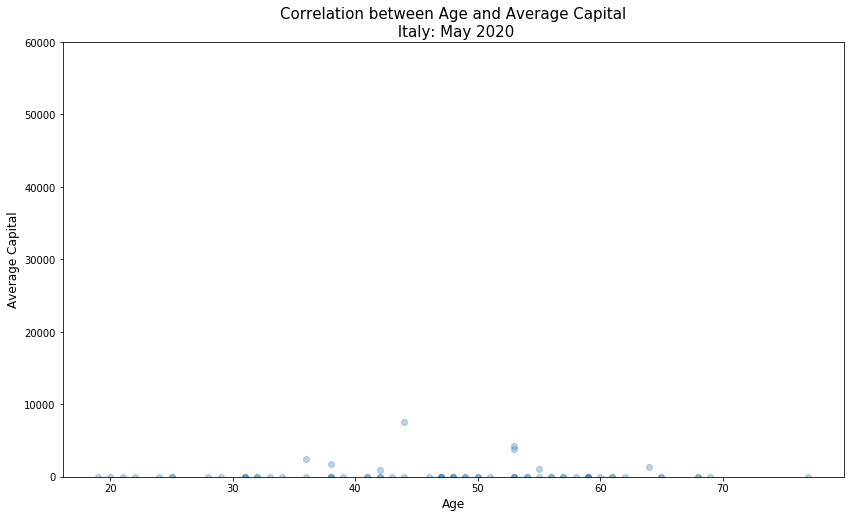

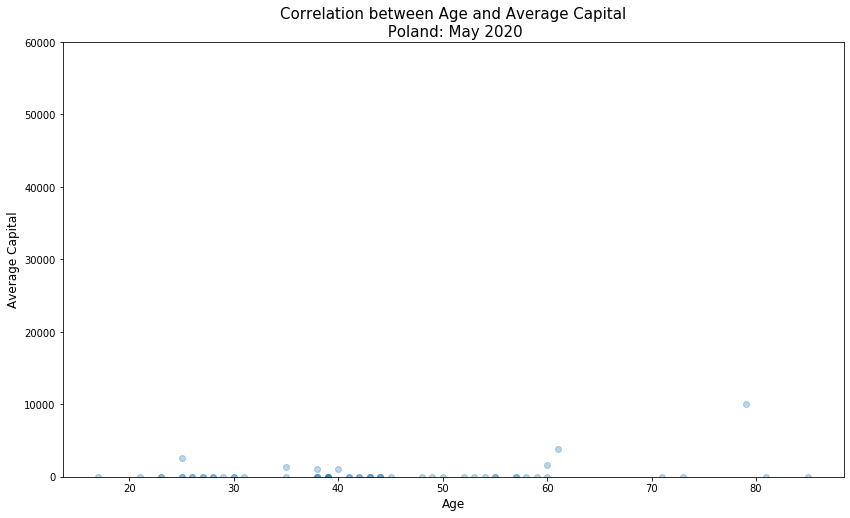

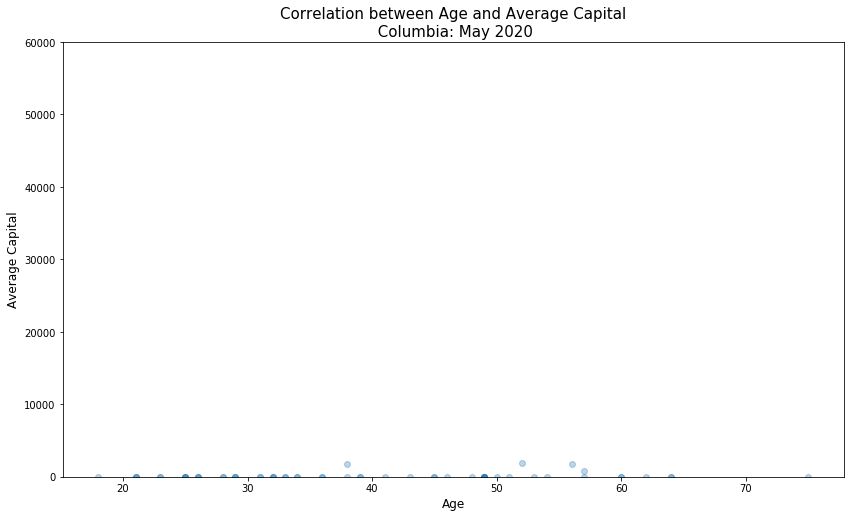

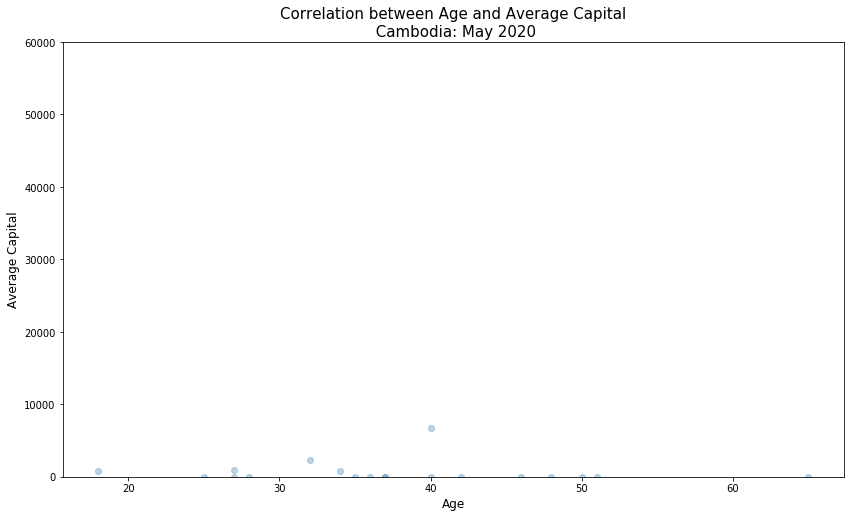

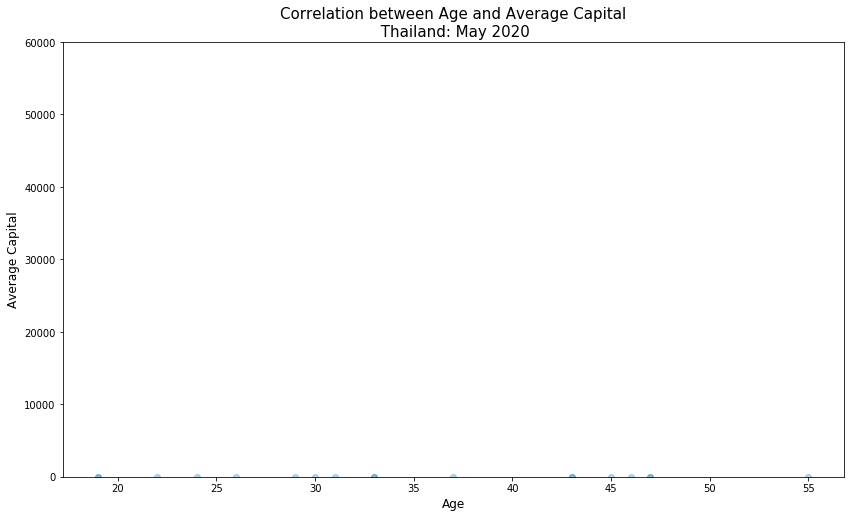

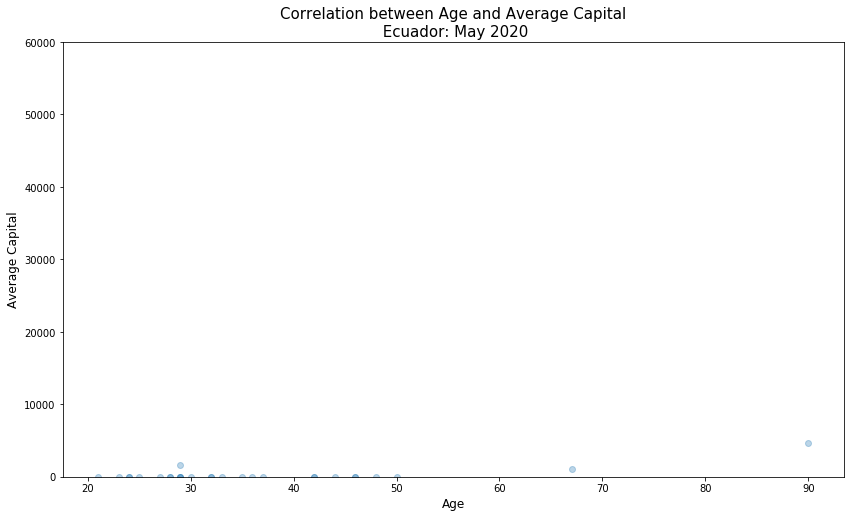

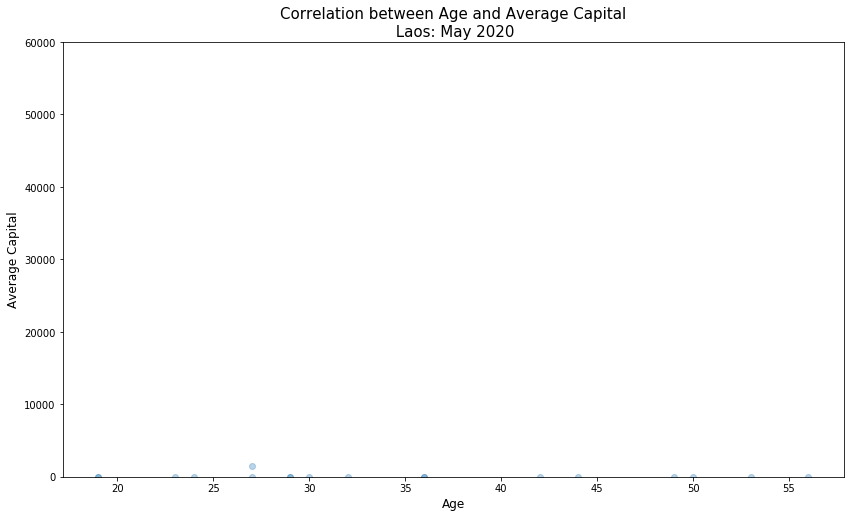

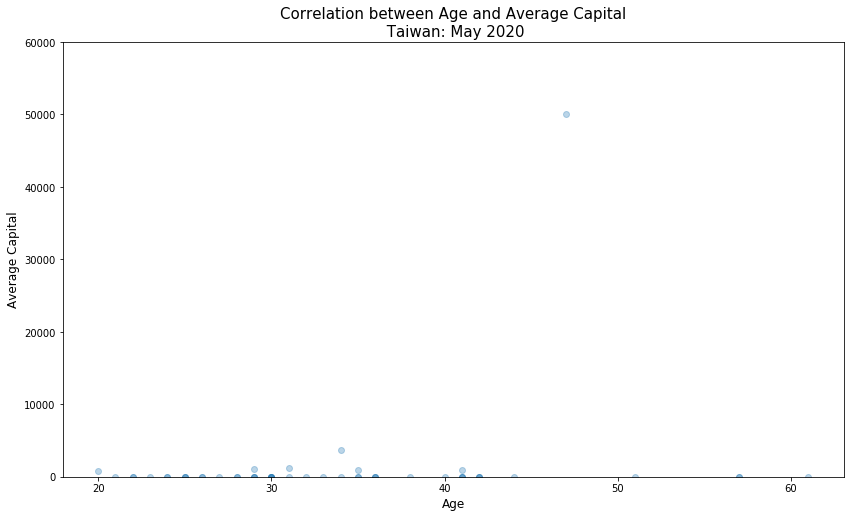

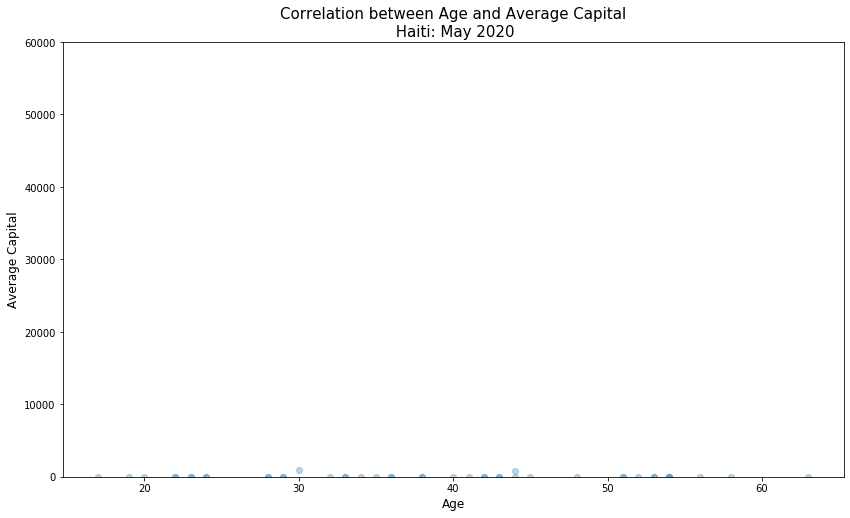

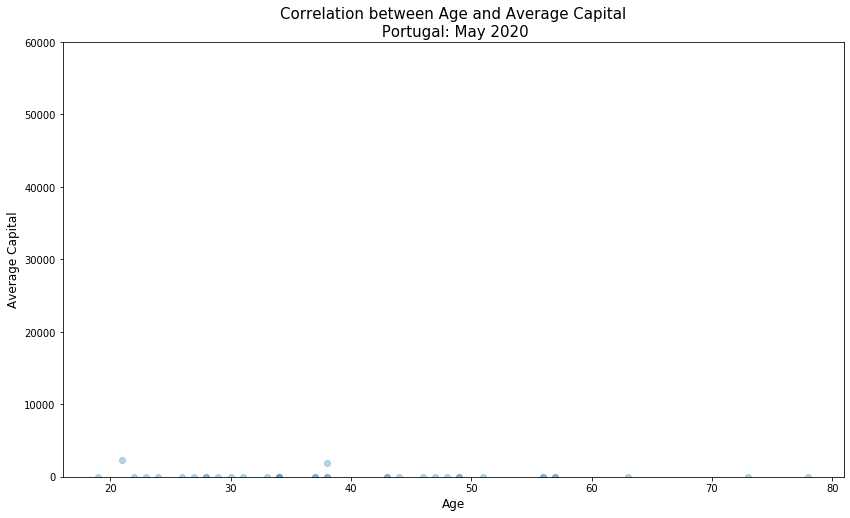

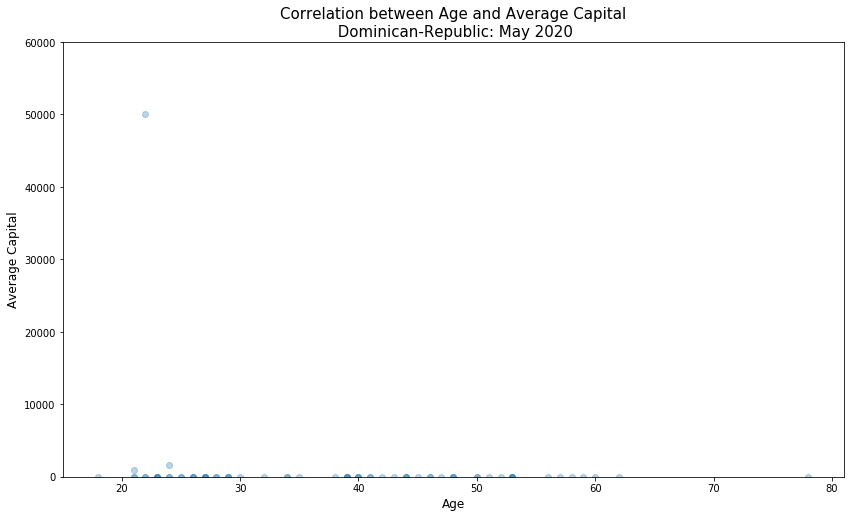

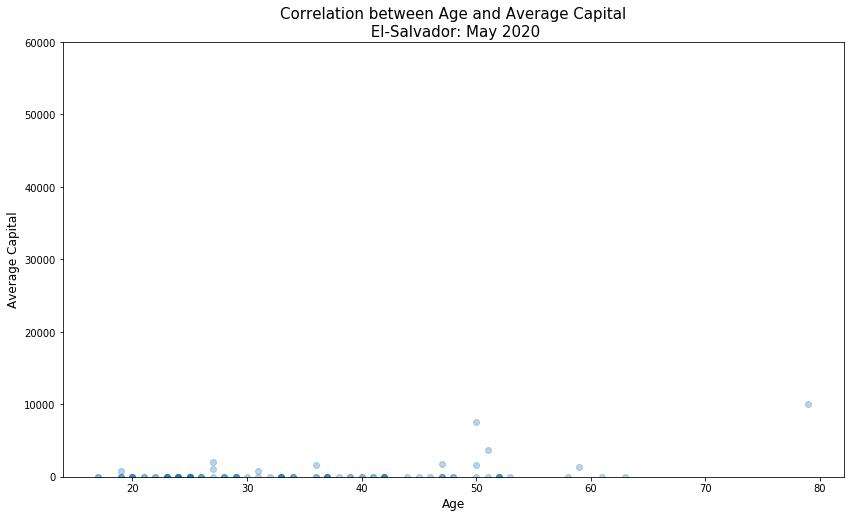

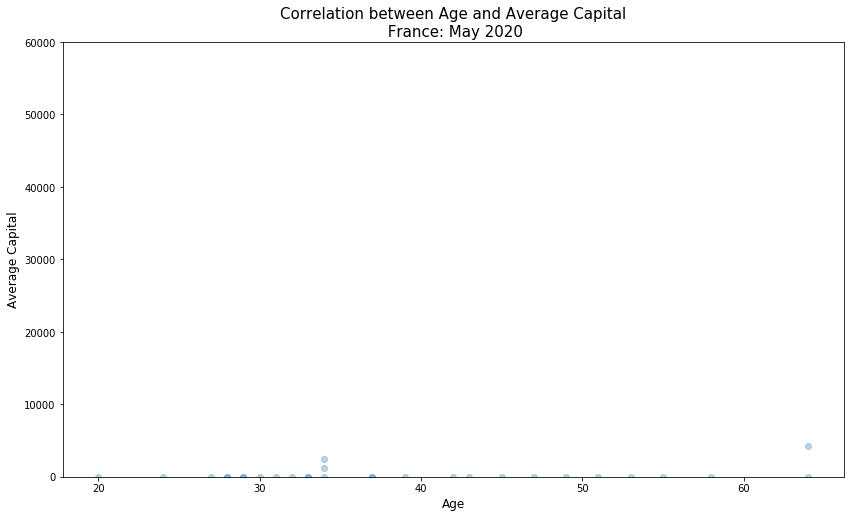

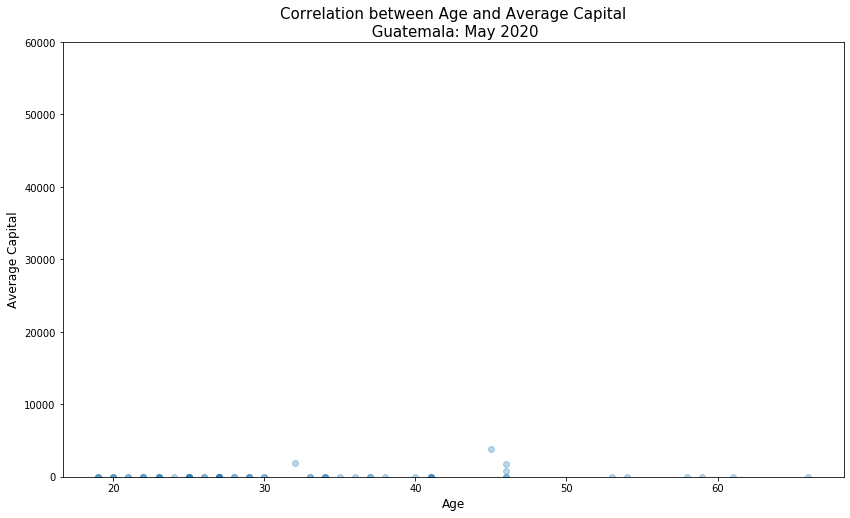

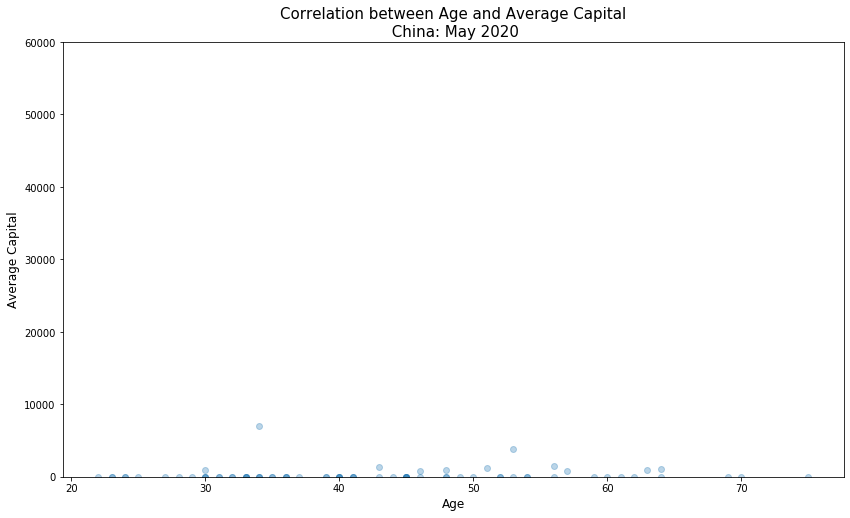

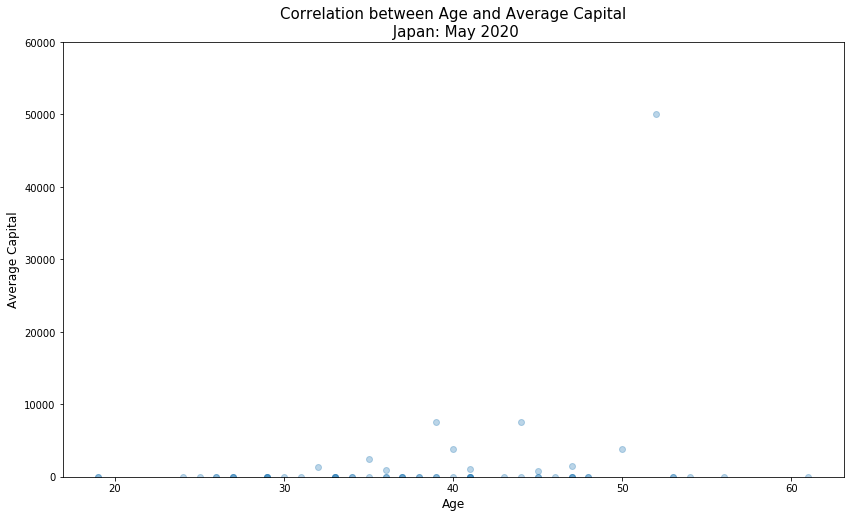

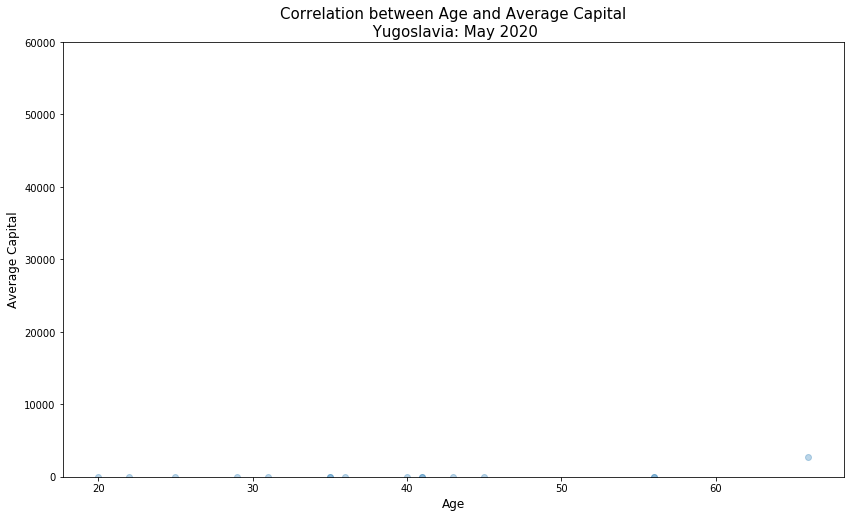

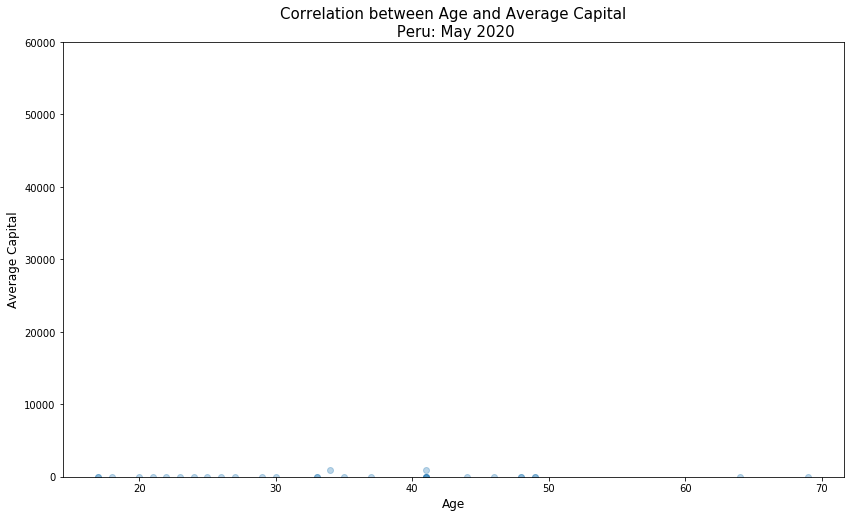

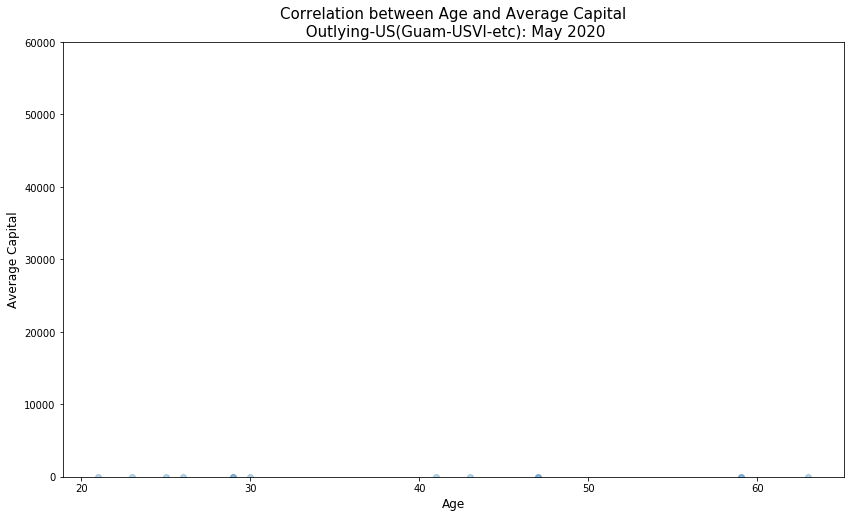

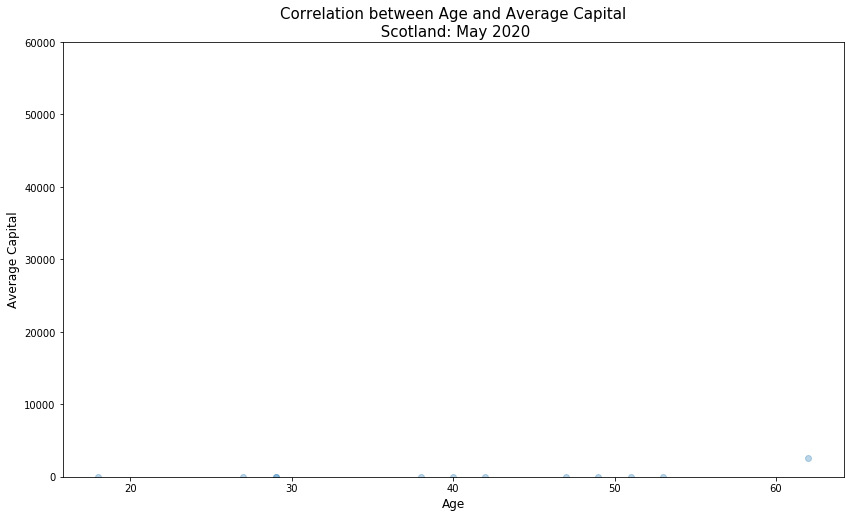

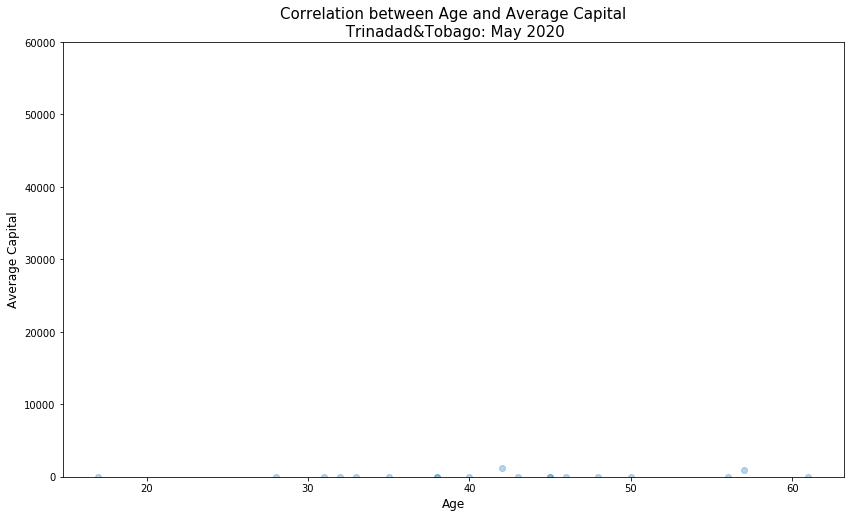

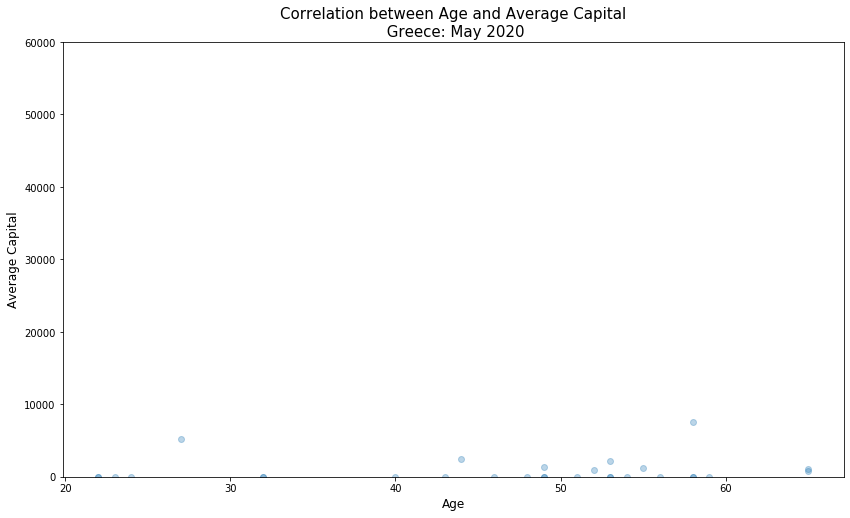

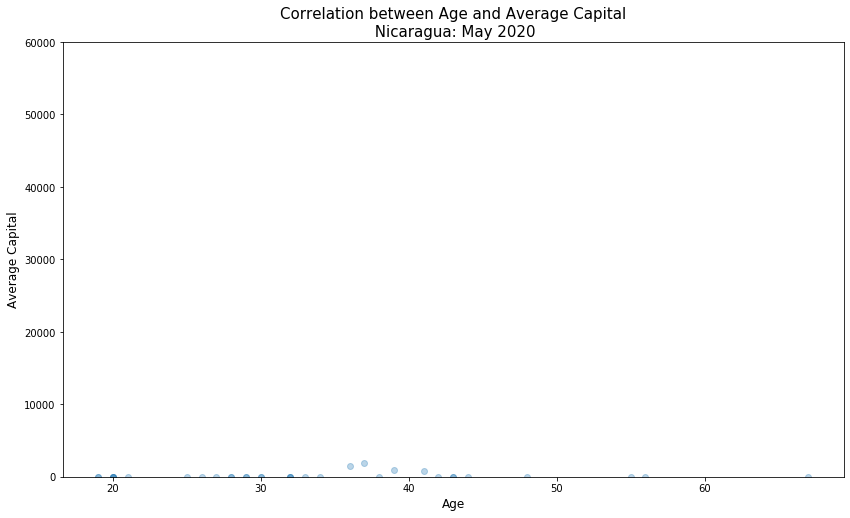

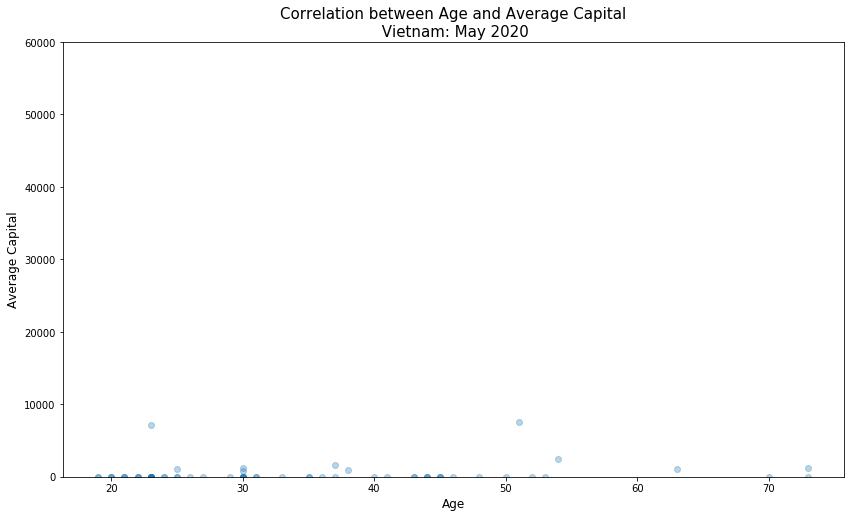

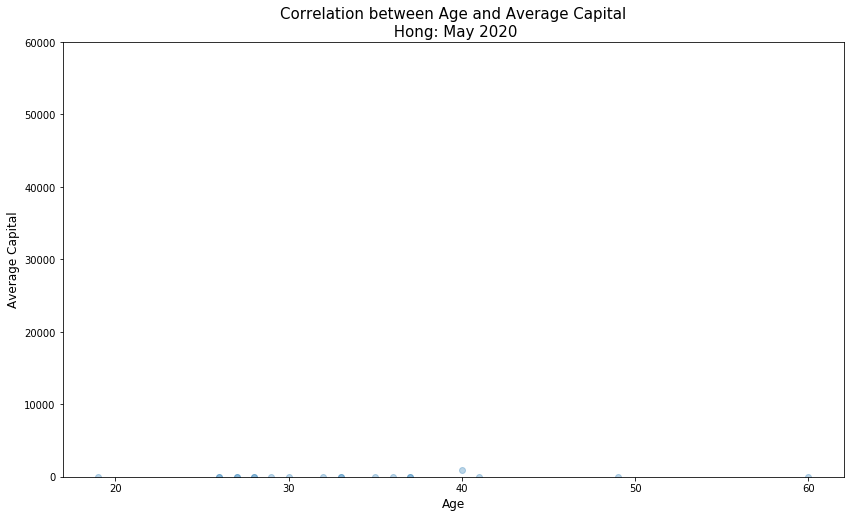

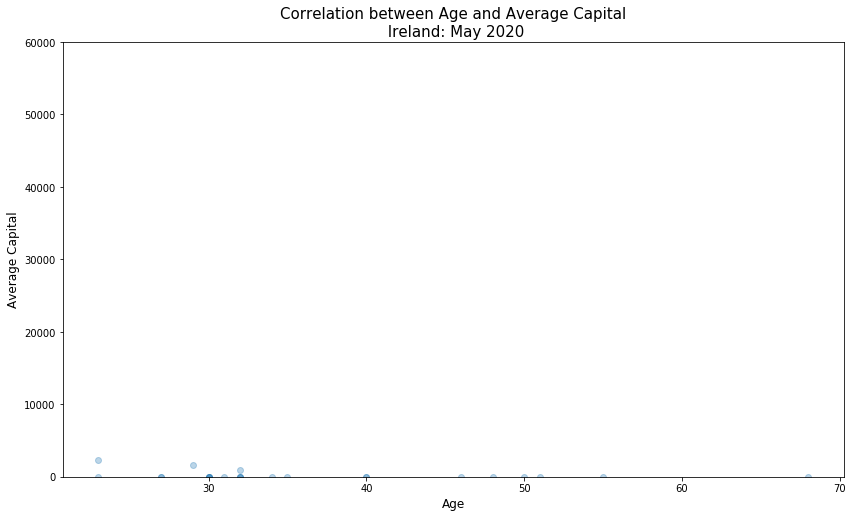

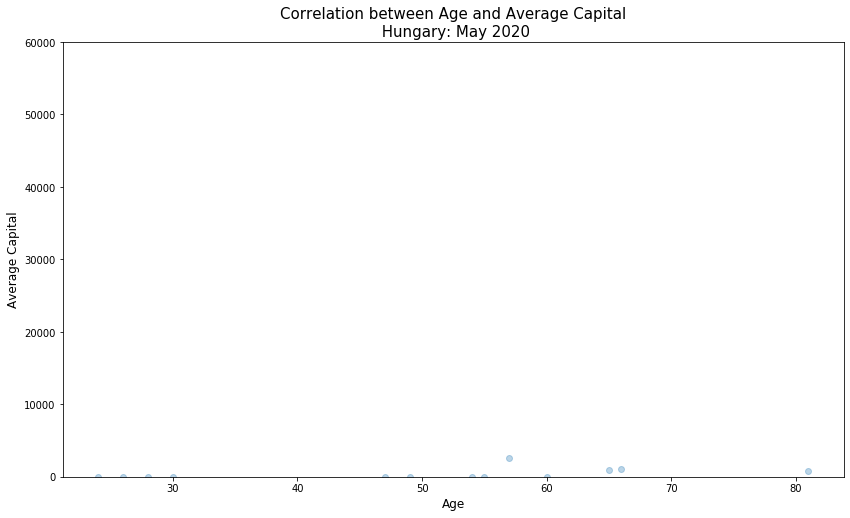

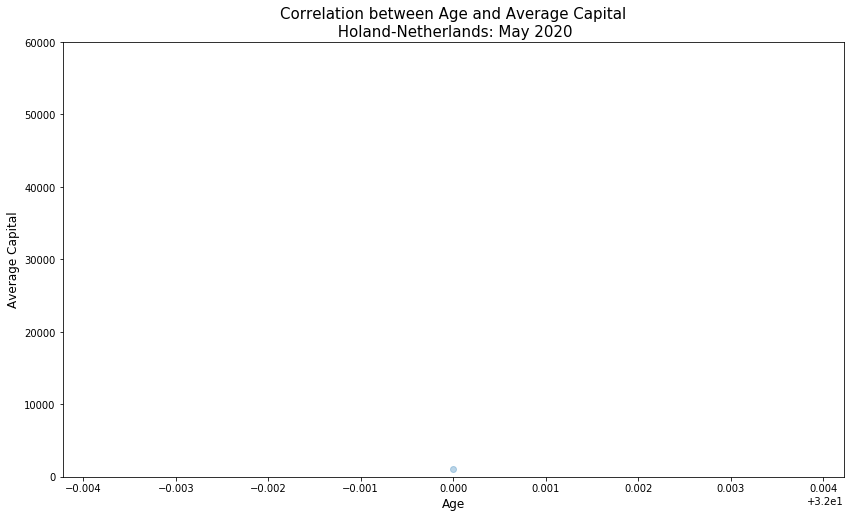

In [137]:
for country in df['native-country'].unique():
    temp = df[df['native-country'] == country]
    plt.scatter(temp.age, temp.avg_capitial, alpha=0.3 )
    plt.title(f'Correlation between Age and Average Capital\n{country}: May 2020', fontsize=15)
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Average Capital', fontsize=12)
    plt.ylim(0, 60_000)
    plt.savefig(f'Corr2020_{country}.pdf')
    plt.show()

## Calculate the average 'capital-gain' for each country

Use pandas groupy

In [23]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,avg_capitial
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1087.0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0.0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0.0


In [26]:
df[['native-country','capital-gain']].groupby('native-country').mean().reset_index()

,native-country,capital-gain
0,Cambodia,1027.842105
1,Canada,1504.132231
2,China,366.480000
3,Columbia,180.610169
4,Cuba,367.231579
5,Dominican-Republic,1476.057143
6,Ecuador,527.607143
7,El-Salvador,574.320755
8,England,864.722222
9,France,547.034483


## Write a function that given a column name prints the following info:
- Number of Non-blank records
- Data type
- Average value (in case it's numerical)
- Unique values (in case it's categorical)

In [43]:
def column_info(col_name):
    """
    Given the column name returns:
    
    - Number of Non-blank records
    - Data type
    - Average value (in case it's numerical)
    - Unique values (in case it's categorical)
    """
    print(f'Number of Non-blank records: {sum(~df[col_name].isna())}')
    print(f'Data type: {df.dtypes[col_name].name}')
    if df.dtypes[col_name].name in ('int64', 'float64'):
        print(f'Average value: {round(df[col_name].mean(), 1)}')
    if df.dtypes[col_name].name == 'object':
        print('Unique values:')
        print(df[col_name].value_counts())

In [45]:
column_info('occupation')

Number of Non-blank records: 30712
Data type: object
Unique values:
Prof-specialty       4139
Craft-repair         4099
Exec-managerial      4065
Adm-clerical         3767
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          927
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


In [46]:
column_info('age')

Number of Non-blank records: 32555
Data type: int64
Average value: 38.6


## Save the final DataFrame both csv and Excel files

In [ ]:
df.to_csv('my_csv.csv', index=False)
df.to_excel('my_csv.xlsx', index=False)

# Part II
In this part each task is independent from the other parts.

Feel free to import any library you want.

## Write a function that for any given path print the following info:
- Number of .py files
- Number of .pdf files
- Number of .csv files
- Number of .xlsx files

In [48]:
from glob import glob

In [51]:
def file_report(path):
    """
    prins the following for a given path
    - Number of .py files
    - Number of .pdf files
    - Number of .csv files
    - Number of .xlsx files
    """
    files = glob(path)
    py_files = [file for file in files if file.endswith('.py')]
    pdf_files = [file for file in files if file.endswith('.pdf')]
    csv_files = [file for file in files if file.endswith('.csv')]
    xlsx_files = [file for file in files if file.endswith('.xlsx')]
    print(f'py files: {len(py_files)}')
    print(f'pdf files: {len(pdf_files)}')
    print(f'csv files: {len(csv_files)}')
    print(f'xlsx files: {len(xlsx_files)}')
  

In [52]:
file_report('/Users/navid/Google Drive/active_python_files/Python_introduction/*')

py files: 4
pdf files: 0
csv files: 0
xlsx files: 0


## write a function that calculate the $A_L$


<img src="Images/lat_sur_area.png" width="500">

- Use *isinstance* and *assert* to make sure the inputs are either integer or float
- for 11, 7, 12 you should get **229.9**

In [151]:
def lateral_surface_area(l, w, h):
    """
    Docstring bla bla
    """
    a = l * (((w / 2)**2+((h)**2)) ** 0.5)
    b = w * (((l / 2)**2+((h)**2)) ** 0.5)
    return a + b

In [152]:
lateral_surface_area(11, 7, 12)

229.90265147710858

## Write a function that replaces spaces with _ in a given text while adds * before and after a specific letter (to be defined as the input)

Example: 'Extraction was done by Barry Beckers from the 1994' given the letter **s** would results in--> 'Extraction_wa\*s\*_done_by_Barry_Becker\*s\*_from_the_1994'

In [70]:
def strange_format(text, letter):
    """
    replaces spaces with _ in a given text while adds * before and after a specific letter
    """
    return text.replace(' ','_').replace(letter, f'*{letter}*')

In [71]:
strange_format('Extraction was done by Barry Beckers from the 1994', 's')

'Extraction_wa*s*_done_by_Barry_Becker*s*_from_the_1994'

## Loading the 'review.txt' from *Data* folder :
- Replace "" with ' (example: ""cidreira"" --> 'cidreira')
- Lowercase the text
- Count how many times a word is repeated in the text and put the results  a dictionary (example: {'a': 53, 'the': 34, ...})
- using *os* library, remove the *review.txt*
- Save the modified text to a file name *review_modified.txt*

In [68]:
from collections import Counter
import os
with open('Data/review.txt', 'r') as file:
    data = file.readlines()
data = ' '.join(data)
data = data.replace('""', "'")
cnt_dit = dict(Counter(data.split()))
#os.remove('review.txt')
with open('review_modified.txt', 'w') as file:
    file.write(data)

## Using list comprehension, *'any'* built-in function and the given data:
create a list of all dictionary keys that in their value there is at least one string with a length higher than 3

In [177]:
data = {'first': ['a', 3, 'aa', 'bbb'],
        'second': ['frigo', 77, 'fifo'],
        'third': [11, 14, 976, 0.109, 'pippo']}

In [179]:
# better version
[k for k, v in data.items() if any([len(str(x)) > 3 for x in v])]

['second', 'third']

In [182]:
# another version
[k for k in data.keys() if any([len(str(x)) > 3 for x in data[k]])]

['second', 'third']

## Other example

### Regex


In [165]:
import re # regex

a = 'my name is Navid and my cat name is oliver'

[x.span() for x in re.finditer('name', a)]

[(3, 7), (28, 32)]

In [175]:
# equal to the above list comprehension
for i in re.finditer('name', a):
    print(i.span())

(3, 7)
(28, 32)


### Counter

In [140]:
A = ['a', 'B', 'a', 'c']

In [143]:
my_count = {}
for i in A:
    if i not in my_count.keys():
        my_count[i] = 1
        print(f'{i} --> {my_count}')
    else:
        my_count[i] += 1
        print(f'{i} --> {my_count}')

a --> {'a': 1}
B --> {'a': 1, 'B': 1}
a --> {'a': 2, 'B': 1}
c --> {'a': 2, 'B': 1, 'c': 1}


In [144]:
from collections import Counter

In [149]:
dict(Counter(df['native-country']))

{' United-States': 29165,
 ' Cuba': 95,
 ' Jamaica': 81,
 ' India': 100,
 nan: 583,
 ' Mexico': 643,
 ' South': 80,
 ' Puerto-Rico': 114,
 ' Honduras': 13,
 ' England': 90,
 ' Canada': 121,
 ' Germany': 137,
 ' Iran': 43,
 ' Philippines': 197,
 ' Italy': 73,
 ' Poland': 60,
 ' Columbia': 59,
 ' Cambodia': 19,
 ' Thailand': 18,
 ' Ecuador': 28,
 ' Laos': 18,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Portugal': 37,
 ' Dominican-Republic': 70,
 ' El-Salvador': 106,
 ' France': 29,
 ' Guatemala': 64,
 ' China': 75,
 ' Japan': 62,
 ' Yugoslavia': 16,
 ' Peru': 31,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Scotland': 12,
 ' Trinadad&Tobago': 19,
 ' Greece': 29,
 ' Nicaragua': 34,
 ' Vietnam': 67,
 ' Hong': 20,
 ' Ireland': 24,
 ' Hungary': 13,
 ' Holand-Netherlands': 1}

In [150]:
# An alternative
df['native-country'].value_counts()

 United-States                 29165
 Mexico                          643
 Philippines                     197
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 